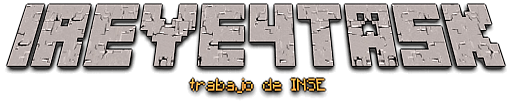

##Carga de librerías e instalación de cosirrigüinchis

In [306]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [307]:
general_path = r'/content/drive/MyDrive/INSE_IREYE4TASK/'

Instalación de librerías de Octave

In [308]:
!apt-get build-dep octave
!apt install octave
!pip install oct2py
!apt-get install unzip
!apt-get install -y octave-tsa
!apt-get install -y octave-linear-algebra
!apt-get install octave-signal

Reading package lists... Done
E: You must put some 'deb-src' URIs in your sources.list
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave-tsa is already the newest version (4.6.3-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave-linear-algebra is already the newest version (2.2.3-3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency t

In [309]:
from oct2py import octave

# 'octave' folder with octave files must be placed in general_path directory
octave_path = general_path + '/octave/'
octave.addpath(octave_path)

'.:/content/drive/MyDrive/INSE_IREYE4TASK/octave:/usr/local/lib/python3.10/dist-packages/oct2py:/usr/local/lib/python3.10/dist-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/6.4.0/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v56/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/site/m:/usr/share/octave/site/api-v56/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/6.4.0/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/m:/usr/share/octave/6.4.0/m/audio:/usr/share/octave/6.4.0/m/deprecated:/usr/share/octave/6.4.0/m/elfun:/usr/share/octave/6.4.0/m/general:/usr/share/octave/6.4.0/m/geometry:/usr/share/octave/6.4.0/m/gui:/usr/share/octave/6.4.0/m/help:/usr/share/octave/6.4.0/m/image:/usr/share/octave/6.4.0/m/io:/usr/share/octave/6.4.0/m/java:/usr/share/octave/6.4.0/m/legacy:/usr/share/octave/6.4.0/m/linear-algebra:/usr/share/octave/6.4.0/m/miscellaneous:/u

Instalación de librerías de Weka

In [310]:
# Install other libraries and python-weka-wrapper3
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install python-weka-wrapper3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Instalación de la máquina de Java para correr Weka

In [311]:
import os #importing os to set environment variable

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # set environment variable
  !java -version # check java version

install_java()

openjdk version "11.0.25" 2024-10-15
OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [ ]:
import weka.core.jvm as jvm

# Create new instance of java virtual machine for running weka
jvm.start(max_heap_size="8192m")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=8192m
DEBUG:weka.core.jvm:Package support disabled


In [312]:
# Import other libraries
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

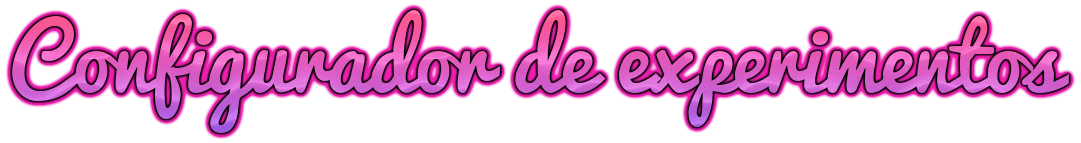

#Selección de opciones de experimentos y de dataset a crujir (LSTM aparte) 🔥 😙

i) Selección del conjunto de datos (¿lo quiere con todo, amigo?)

In [313]:
touched = 1
#0 para mantener todos los datos
#1 para quitar las clases de baja carga

ii) Configuración de experimento (clase a evaluar)

In [314]:
#0 para dejar todas las clases por defecto. 1 para quitar las clases que no me gustaban
percentage_test_split = 0.33
set_experiment = 1 #Variable de configuración del experimento
#0 para evaluar la clase ACTIVE
#1 para Var2
#2 para Var1

iii) Selección de parámetros

In [259]:
set_parameters = 0 #Variable de configuración de los parámetros con los que vamos a jugar
set_eyestate = 0 #Variable para mantener o no el parámetro eyestate (0 no 1 sí)
#0 - Todos
#1 - Solo las características calculadas
#2 - Solo los puntos originales
#3 - Solo mantenemos eyestate

##Carga de Datos

In [263]:
# Load CSV data
def DownloadDS(filename):
  df_csv = pd.read_csv(filename, sep=",", header=0, dtype = {'Var1' : 'string', 'Var2' : 'string'})
  df_csv = df_csv.drop(columns=['index', 'timestamp'], axis = 1)
  #df_csv.columns = col_names
  return df_csv

if touched == 0:
  path_data = general_path + r'/dataset/data_joined13.csv'
else:
  path_data = general_path + r'/dataset/data_joined13_touched.csv'

df_csv = DownloadDS(path_data)

df_csv

,Var1,Var2,eyestate,x0,x1,x2,x3,x4,x5,x6,...,TLL2,SLL3,TLL3,IR0,IR1,IR2,PU0,PU1,PU2,ACTIVE
0,perH,Task,0,201.8948,280.3251,349.0857,438.3579,520.3826,586.0857,623.6130,...,3.140492,-0.053498,3.078149,0.520019,2.544262,0.407239,0.853786,0.864230,-0.010444,1
1,perH,Task,0,203.5141,278.3533,345.8807,435.8751,519.4365,585.0496,622.7648,...,3.137547,-0.051701,3.062205,0.519395,2.553305,0.423562,0.853786,0.864230,-0.010444,1
2,perH,Task,0,203.5242,280.6212,348.9937,439.0706,521.6741,586.6229,622.4153,...,3.138603,-0.049472,3.064038,0.518305,2.554321,0.423403,0.853786,0.864230,-0.010444,1
3,perH,Task,0,203.3223,281.4304,350.9305,440.6833,522.6800,588.0937,623.0691,...,3.140780,-0.055747,3.074005,0.517621,2.532196,0.411341,0.853786,0.864230,-0.010444,1
4,perH,Task,0,202.7467,278.5327,344.2423,432.6127,515.8658,583.6069,622.8047,...,3.132772,-0.061299,3.071128,0.521356,2.534689,0.386928,0.853786,0.864230,-0.010444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173658,pause,pause,0,69.5788,149.0226,229.4614,327.6170,423.4381,502.7351,547.1968,...,2.736975,0.185731,2.603794,0.834192,2.720558,0.411068,0.872656,0.729576,0.143080,0
173659,pause,pause,0,70.6545,151.8898,229.7048,323.8312,417.0371,495.8203,540.0248,...,2.724338,0.204170,2.596100,0.846185,2.690595,0.413308,0.872656,0.729576,0.143080,0
173660,pause,pause,0,69.2273,145.6447,226.5000,324.9516,420.5921,497.1838,541.7757,...,2.746374,0.198138,2.610307,0.845351,2.709083,0.421136,0.872656,0.729576,0.143080,0
173661,pause,pause,0,69.0645,149.7800,230.9662,325.7404,420.8915,499.8059,542.5663,...,2.735034,0.185065,2.599857,0.839236,2.695662,0.417172,0.872656,0.729576,0.143080,0


In [264]:
if set_experiment == 0:
  y = df_csv['ACTIVE']
elif set_experiment == 1:
  y = df_csv['Var2']
else:
  y = df_csv['Var1']


y

,Var1
0,perH
1,perH
2,perH
3,perH
4,perH
...,...
173658,pause
173659,pause
173660,pause
173661,pause


In [265]:
X = df_csv.drop(columns=['ACTIVE', 'Var2', 'Var1']) #En todos los casos me cepillo las tres clases

if set_eyestate == 0 and set_parameters != 3:
  X = X.drop(columns = ['eyestate'])

dropperlist = []
if set_parameters == 1:
  dropperlist = ['x' + str(i) for i in range(28)] + ['y' + str(i) for i in range(28)]
elif set_parameters == 2:
  dropperlist = ['SUL1', 'TUL1', 'SUL2', 'TUL2', 'SUL3', 'TUL3', 'SLL1', 'TLL1', 'SLL2', 'TLL2', 'SLL3', 'TLL3', 'IR0', 'IR1', 'IR2', 'PU0', 'PU1', 'PU2']

elif set_parameters == 3:
  dropperlist = ['x' + str(i) for i in range(28)] + ['y' + str(i) for i in range(28)] + ['SUL1', 'TUL1', 'SUL2', 'TUL2', 'SUL3', 'TUL3', 'SLL1', 'TLL1', 'SLL2', 'TLL2', 'SLL3', 'TLL3', 'IR0', 'IR1', 'IR2', 'PU0', 'PU1', 'PU2']

X = X.drop(columns = dropperlist)

X


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,SLL2,TLL2,SLL3,TLL3,IR0,IR1,IR2,PU0,PU1,PU2
0,201.8948,280.3251,349.0857,438.3579,520.3826,586.0857,623.6130,580.7252,512.8394,441.2684,...,0.011904,3.140492,-0.053498,3.078149,0.520019,2.544262,0.407239,0.853786,0.864230,-0.010444
1,203.5141,278.3533,345.8807,435.8751,519.4365,585.0496,622.7648,579.6819,511.9168,440.2296,...,0.017465,3.137547,-0.051701,3.062205,0.519395,2.553305,0.423562,0.853786,0.864230,-0.010444
2,203.5242,280.6212,348.9937,439.0706,521.6741,586.6229,622.4153,580.4638,512.6030,441.0258,...,0.022265,3.138603,-0.049472,3.064038,0.518305,2.554321,0.423403,0.853786,0.864230,-0.010444
3,203.3223,281.4304,350.9305,440.6833,522.6800,588.0937,623.0691,581.1498,513.1766,441.1699,...,0.015456,3.140780,-0.055747,3.074005,0.517621,2.532196,0.411341,0.853786,0.864230,-0.010444
4,202.7467,278.5327,344.2423,432.6127,515.8658,583.6069,622.8047,578.9717,508.8248,437.4191,...,0.009366,3.132772,-0.061299,3.071128,0.521356,2.534689,0.386928,0.853786,0.864230,-0.010444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173658,69.5788,149.0226,229.4614,327.6170,423.4381,502.7351,547.1968,495.0161,406.7678,303.5701,...,0.260876,2.736975,0.185731,2.603794,0.834192,2.720558,0.411068,0.872656,0.729576,0.143080
173659,70.6545,151.8898,229.7048,323.8312,417.0371,495.8203,540.0248,488.7911,403.0670,301.0758,...,0.283803,2.724338,0.204170,2.596100,0.846185,2.690595,0.413308,0.872656,0.729576,0.143080
173660,69.2273,145.6447,226.5000,324.9516,420.5921,497.1838,541.7757,489.4647,404.2793,303.5000,...,0.264416,2.746374,0.198138,2.610307,0.845351,2.709083,0.421136,0.872656,0.729576,0.143080
173661,69.0645,149.7800,230.9662,325.7404,420.8915,499.8059,542.5663,492.5579,405.3788,301.2551,...,0.265493,2.735034,0.185065,2.599857,0.839236,2.695662,0.417172,0.872656,0.729576,0.143080


In [266]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=percentage_test_split,
                                                    random_state=42) #Luego se rehará sin splits. Todos estos datos son de train.


df_train_csv = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

df_train_csv

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,TLL2,SLL3,TLL3,IR0,IR1,IR2,PU0,PU1,PU2,Var1
0,111.0078,190.0502,274.8714,375.0594,462.8308,535.4942,580.4821,539.2029,467.8768,375.0296,...,2.772093,-0.255604,2.648345,0.664235,2.801738,0.294407,0.926923,0.765843,0.161080,perH
1,63.5784,163.3055,229.3639,329.9165,423.0147,505.9656,539.6680,492.7193,410.7843,322.7825,...,2.954503,-0.147116,2.800182,0.837226,2.547975,0.309309,0.903485,0.812332,0.091153,phyH
2,68.3884,157.0952,236.2690,337.7551,436.1450,513.4511,548.3077,501.2410,418.5539,323.6929,...,3.058944,0.120983,2.998831,0.822652,2.528502,0.467416,0.872656,0.729576,0.143080,comH
3,55.7777,146.2554,201.9526,296.4542,398.3723,482.9935,534.7402,477.2894,394.9268,309.1114,...,3.036092,-0.218599,3.043582,0.892496,2.530943,0.522869,0.822492,0.807315,0.015177,cogH
4,198.7994,273.3219,337.2011,420.1077,504.5679,572.5545,623.6179,572.7614,504.8968,432.0567,...,3.122567,-0.008635,3.112169,0.535066,2.579080,0.424423,0.853786,0.864230,-0.010444,comH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116349,114.0085,199.1160,280.3235,376.7091,462.6442,533.8295,572.1064,538.7042,469.2309,381.0648,...,2.820533,-0.307014,2.642841,0.662643,2.645760,0.308840,0.926923,0.765843,0.161080,perH
116350,35.0706,175.0215,264.7995,386.5910,472.7780,534.4249,572.9814,527.8972,455.4284,366.7364,...,3.080103,0.120302,3.049508,0.836450,2.698035,0.401344,1.000000,0.969571,0.030429,cogH
116351,109.2814,187.5836,274.4221,379.5662,467.1201,538.1683,588.7827,538.7251,468.2997,375.5383,...,2.757357,-0.233255,2.664665,0.666324,2.911625,0.273100,0.926923,0.765843,0.161080,cogH
116352,61.8113,160.2655,224.4047,324.7076,421.0189,505.5091,536.7324,492.8982,410.7448,324.5799,...,3.005014,-0.136995,2.873754,0.837546,2.496034,0.328270,0.903485,0.812332,0.091153,cogH


In [267]:
df_val_csv = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)

df_val_csv

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,TLL2,SLL3,TLL3,IR0,IR1,IR2,PU0,PU1,PU2,Var1
0,83.8858,171.5051,227.2714,322.3164,413.6783,472.2692,508.7737,467.7798,410.2894,331.1589,...,3.022750,-0.136248,2.948999,0.843212,2.443931,0.465323,0.872309,0.805389,0.066920,perH
1,195.0879,269.7379,319.5047,397.1407,476.7675,541.4642,607.1563,541.4642,475.7722,410.0801,...,2.921903,-0.047138,2.785334,0.588394,2.535109,0.108010,0.853786,0.864230,-0.010444,cogH
2,114.6481,197.7934,279.2023,373.8799,457.5613,529.2203,570.8027,536.6802,464.9933,377.7635,...,2.810789,-0.311323,2.633834,0.665310,2.679886,0.308852,0.926923,0.765843,0.161080,perH
3,84.7443,181.1398,258.4135,353.8303,421.1513,462.8937,492.4276,458.9577,412.4828,348.2710,...,2.975839,-0.055497,2.955068,0.862731,2.674535,0.422870,0.872309,0.805389,0.066920,phyH
4,52.7340,145.2311,199.5265,284.6446,396.7947,485.5767,522.5966,479.4944,392.7207,288.4644,...,2.851608,-0.009701,2.712729,0.734719,2.410633,0.421678,0.903427,0.775701,0.127726,perH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,110.0942,178.4523,256.3174,347.2922,433.5160,514.9820,576.0792,521.4958,440.5145,347.1823,...,2.806644,-0.163673,2.671467,0.693570,2.835250,0.297462,0.926923,0.765843,0.161080,perH
57305,109.0522,185.4169,270.9731,373.2130,459.5388,534.1844,586.7659,535.8329,466.5710,371.2327,...,2.743349,-0.221093,2.651495,0.671019,2.915500,0.283388,0.926923,0.765843,0.161080,cogH
57306,114.9680,195.7003,275.8213,370.7087,455.8953,527.4791,569.7742,533.5507,463.1183,375.1385,...,2.804818,-0.296586,2.635670,0.670028,2.701367,0.294231,0.926923,0.765843,0.161080,perH
57307,52.0590,142.1456,197.0291,281.1394,394.4012,482.2903,523.0454,477.1781,391.1520,284.7935,...,2.845778,-0.003988,2.700611,0.739144,2.418906,0.397697,0.903427,0.775701,0.127726,perH


Convertir la clase a parámetro nominal

In [268]:
def get_class(experiment):
  """
  name (string) the numeric classes of the data
  """
  classes_list = []

  if experiment == 0:
    classes_list = ['IDLE', 'ACTIVE']
  elif experiment == 1:
    classes_list = ['TASK', 'LISNH', 'LISNL', 'IDLE', 'PRETASK', 'RATING', 'SPKH', 'SPKL']
  else:
    classes_list = ['AFTEXP', 'BEFEXP', 'COGH', 'COGL', 'COMH', 'COML', 'PAUSE', 'PERH', 'PERL', 'PHYH', 'PHYL']

  if touched == 1:
    if experiment == 1:
      remover = ['LISNL', 'SPKL', 'PRETASK']
    elif experiment == 2:
      remover = ['AFTEXP', 'BEFEXP', 'COGL', 'COML', 'PERL', 'PHYL']

    for elem in remover:
      classes_list.remove(elem)

  return classes_list


def create_class_mapping(class_names):
  """
  create dictionary classes
  """
  class_mapping = {}
  for i, class_name in enumerate(class_names):
      class_mapping[i+1] = class_name
  return class_mapping

def Convert2nominal_activities(class_number, class_mapping):
  """
  mapping classes
  """
  if class_number in class_mapping:
      return class_mapping[class_number]
  else:
      return "UNK"

In [269]:
classes_list = get_class(set_experiment)
class_mapping = create_class_mapping(classes_list)
print(' ')
print('[CLASSES]')
print(' ')
print("Defined classes are:")
for c in classes_list:
    print('\t%s' % c)

 
[CLASSES]
 
Defined classes are:
	COGH
	COMH
	PAUSE
	PERH
	PHYH


In [270]:
class_mapping

{1: 'COGH', 2: 'COMH', 3: 'PAUSE', 4: 'PERH', 5: 'PHYH'}

Guardo como CSV


In [271]:
def Save_CSV_from_Df(df_in, output_csv_filename, experiment):
  df_out = df_in.copy()
  # Convert class data from numeric to nominal
  if experiment == 0:
    classcol = 'ACTIVE'
    #df_out[classcol] = df_out[classcol].astype(str)
    df_out[classcol] = df_out[classcol].replace(0, "IDLE")
    df_out[classcol] = df_out[classcol].replace(1, "ACTIVE")
  elif experiment == 1:
    classcol = 'Var2'
  else:
    classcol = 'Var1'

  df_out['labels'] = df_out[classcol].replace(class_mapping)

  df_out
  # Remove numeric class and user column
  df_out = df_out.drop([classcol], axis=1)
  df_out = df_out.sort_values(by='labels')
  # Save dataframe
  df_out.to_csv(output_csv_filename, sep = ",", index=False, header=True, float_format=f'%.8f')


Save_CSV_from_Df(df_train_csv, general_path + r'/dataset/df_train_nominal.csv', set_experiment)
Save_CSV_from_Df(df_val_csv, general_path + r'/dataset/df_val_nominal.csv', set_experiment)


##Definición de las funciones de carga para Weka

In [272]:
import weka.core.jvm as jvm
from weka.core.converters import Loader, Saver
from weka.core.dataset import Instances
from weka.classifiers import Classifier, Evaluation
from weka.core.dataset import Instance
import weka.core.serialization as serialization


def LoadDatasetAsCSV(dataset_file, debug = False):
    """
    Load a dataset in a Weka known format and return it. The input dataset must have the class as the last attribute.
      :param dataset_file: Path to the input dataset in CSV format.
    """
    if debug:
       print("\n[LoadDataset]\ninput file = " + dataset_file + "\n")
    loader = Loader("weka.core.converters.CSVLoader")
    dataset = loader.load_file(dataset_file)
    dataset.class_is_last()
    return dataset


def CreateClassifier(classname="weka.classifiers.trees.J48", options=["-C", "0.25"]):
  """
    Create a new mode/classifier usig Weka.
      :param classname: This param receive the package in which the algorithm is, as it appears in Weka API. (https://weka.sourceforge.io/doc.stable/)
      :param options: List with the opcions that the algorithm accepts. This options vary with the algorithm, check Weka API for more information about
      the options that each algorithm has.
  """
  model = Classifier(classname=classname, options=options)
  return model

def LoadClassifier(classifier_file, debug=False):
    """
      Load a classifier from its saved archive ***.model .
      :param classifier_file: Path where we have the classifier saved: e.g. J48_trained_model.model
    """
    if debug:
        print("\n[LoadClassifier][" + classifier_file + "]\n")
    # read classifier object
    model = Classifier(jobject=serialization.read(classifier_file))
    print(model)
    return model

def TrainModel(train_dataset, classifier, output_path_model):
    """
      Train a built model.
      :param train_dataset: Dataset loaded in Weka format (see LoadDatasetAsCSV or LoadDataset).
      :param classifier: Classifier built or created (see CreateClassifier)
      :param output_path_model: Path where we want to save our model. e.g. "J48_trained_model.model"
    """
    #Indicate where is class label
    train_dataset.class_is_last()

    # train classifier
    classifier.build_classifier(train_dataset)

    # save classifier object
    print("\n[TrainedModel]\n\n")
    print(classifier)
    serialization.write(output_path_model, classifier)
    return classifier

def EvalClassifier(trained_classifier, train_dataset, test_dataset):
    """
      Eval a trained model.
      :param trained_classifier: Classifier built and trained(see TrainModel)
      :param train_dataset: Dataset loaded in Weka format with training data (see LoadDatasetAsCSV or LoadDataset).
      :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
    """
    evl_train = Evaluation(train_dataset)
    evl_test = Evaluation(train_dataset)
    print("--------RESULTS IN TRAINING----------")
    evl_train.test_model(trained_classifier, train_dataset)
    print(evl_train.summary())
    print("--------RESULTS IN TEST----------")
    evl_test.test_model(trained_classifier, test_dataset)
    print(evl_test.summary())
    eval_accuracy = evl_test.percent_correct
    return eval_accuracy

def Recognize(trained_classifier,test_dataset):
    """
      Make predictions of full dataset and print information of each sample results.
      :param trained_classifier: Classifier built and trained(see TrainModel)
      :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
    """
    print("# - actual - predicted - error - class distribution")
    for index, inst in enumerate(test_dataset):
      pred = trained_classifier.classify_instance(inst)
      dist = trained_classifier.distribution_for_instance(inst)
      print("%d - %s - %s - %s  - %s" %
                (index+1,
                inst.get_string_value(inst.class_index),
                inst.class_attribute.value(int(pred)),
                "yes" if pred != inst.get_value(inst.class_index) else "no",
                str(dist.tolist())))

Cargo a Weka


In [273]:
dataset_train_weka = LoadDatasetAsCSV(general_path + r'/dataset/df_train_nominal.csv', debug = False)
dataset_test_weka = LoadDatasetAsCSV(general_path + r'/dataset/df_val_nominal.csv', debug = False)

print('Sample size training: ', dataset_train_weka.num_instances)
print('Sample size testing: ', dataset_test_weka.num_instances)

Sample size training:  116354
Sample size testing:  57309


In [274]:
print(dataset_train_weka[0:24])

@relation df_train_nominal

@attribute x0 numeric
@attribute x1 numeric
@attribute x2 numeric
@attribute x3 numeric
@attribute x4 numeric
@attribute x5 numeric
@attribute x6 numeric
@attribute x7 numeric
@attribute x8 numeric
@attribute x9 numeric
@attribute x10 numeric
@attribute x11 numeric
@attribute x12 numeric
@attribute x13 numeric
@attribute x14 numeric
@attribute x15 numeric
@attribute x16 numeric
@attribute x17 numeric
@attribute x18 numeric
@attribute x19 numeric
@attribute x20 numeric
@attribute x21 numeric
@attribute x22 numeric
@attribute x23 numeric
@attribute x24 numeric
@attribute x25 numeric
@attribute x26 numeric
@attribute x27 numeric
@attribute y0 numeric
@attribute y1 numeric
@attribute y2 numeric
@attribute y3 numeric
@attribute y4 numeric
@attribute y5 numeric
@attribute y6 numeric
@attribute y7 numeric
@attribute y8 numeric
@attribute y9 numeric
@attribute y10 numeric
@attribute y11 numeric
@attribute y12 numeric
@attribute y13 numeric
@attribute y14 numeric
@at

##Entrenamiento de modelos de Weka

i) Weka J48

In [275]:
print('Classifying on: ', dataset_test_weka.class_attribute)

# Create model architecture:
options_J48 = ["-C", "0.25"]
options_J48_pruned = ["-C", "0.25", "-M", "10"]
model_arquitecture = CreateClassifier(classname="weka.classifiers.trees.J48", options=options_J48)
print("Set experiment: " + str(set_experiment))
print("Parameter group: " + str(set_parameters))
print("Eyestate included: " + str(set_eyestate))
# Train model
!cd content; mkdir models
out_path_model = "models/trained_TreeRandomForest.model" #Sin directorios, a pelo.
trained_model = TrainModel(dataset_train_weka, model_arquitecture, out_path_model)

Streaming output truncated to the last 5000 lines.
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x27 <= 252.454
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x26 <= 223.157
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x4 <= 350.4281: cogH (4.0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x4 > 350.4281: pause (4.0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x26 > 223.157
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   SUL1 <= -0.025337
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   x26 <= 239.875
|   |   |   |   | 

In [120]:
raw_system_test_acc = EvalClassifier(trained_model, dataset_train_weka, dataset_test_weka)

--------RESULTS IN TRAINING----------

Correctly Classified Instances      111400               95.7423 %
Incorrectly Classified Instances      4954                4.2577 %
Kappa statistic                          0.933 
Mean absolute error                      0.0351
Root mean squared error                  0.1321
Relative absolute error                 10.9964 %
Root relative squared error             33.0797 %
Total Number of Instances           116354     

--------RESULTS IN TEST----------

Correctly Classified Instances       45569               79.5146 %
Incorrectly Classified Instances     11740               20.4854 %
Kappa statistic                          0.6771
Mean absolute error                      0.1107
Root mean squared error                  0.3046
Relative absolute error                 34.7711 %
Root relative squared error             76.3786 %
Total Number of Instances            57309     



no vale para mucho, pero ya que tengo la función hecha... a ver qué tal predice



In [118]:
Recognize(trained_model, dataset_test_weka)

Streaming output truncated to the last 5000 lines.
52310 - spkH - spkH - no  - [0.0, 0.0, 0.0, 1.0]
52311 - spkH - spkH - no  - [0.3333333333333333, 0.0, 0.0, 0.6666666666666666]
52312 - spkH - pause - yes  - [0.3333333333333333, 0.6666666666666666, 0.0, 0.0]
52313 - spkH - spkH - no  - [0.0, 0.0, 0.0, 1.0]
52314 - spkH - spkH - no  - [0.0, 0.0, 0.0, 1.0]
52315 - spkH - spkH - no  - [0.0, 0.0, 0.0, 1.0]
52316 - spkH - spkH - no  - [0.0, 0.21428571428571427, 0.0, 0.7857142857142857]
52317 - spkH - spkH - no  - [0.00628140703517588, 0.011306532663316583, 0.002512562814070352, 0.9798994974874372]
52318 - spkH - spkH - no  - [0.0, 0.0, 0.011111111111111112, 0.9888888888888889]
52319 - spkH - spkH - no  - [0.0, 0.0, 0.0, 1.0]
52320 - spkH - spkH - no  - [0.0, 0.05555555555555555, 0.0, 0.9444444444444444]
52321 - spkH - spkH - no  - [0.0, 0.0, 0.009433962264150943, 0.9905660377358491]
52322 - spkH - spkH - no  - [0.0, 0.0, 0.125, 0.875]
52323 - spkH - spkH - no  - [0.04, 0.08, 0.0, 0.88]
523

#La red recurrente LSTM

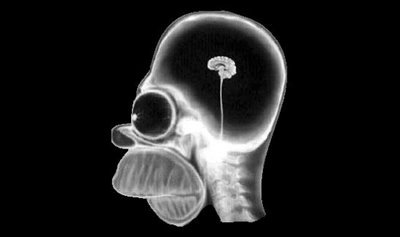

In [315]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("TEST GPU is working: ", tf.test.gpu_device_name())
print("Tensorflow version:", tf.__version__)

TEST GPU is working:  
Tensorflow version: 2.17.1


In [316]:
import pandas as pd
import numpy as np

#from tensorflow.python.keras.models import Sequential
from tensorflow.keras import Sequential
#from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def PrepareData(df_csv, num_steps = 300, dimensions = 3):
  """
    Prepare dataset for introducing data into LSTM. One important characteristic of LSTM is that they are temporal models, so data must follow a specific shape:
    (num_samples, num_steps, num_attributes), in our case for the training set will be: (4.800, 200, 3). We use 200 timesteps (4 secs.) because each sample has this temporal resoulution, number 3 makes reference to
    the number of attributes, in our case 3 becasue we introduce information about the 3-axis of the accelerometer signal.
    This function results the dataset as X and the labels in the array y.
    :param df_csv: Dataframe with the set to convert
    :param num_steps: Number of timesteps
    :param dimensions: Number of attributes
  """

  # We select all rows (:) and all columns up to the last column (:-1).
  # This means it includes all columns except for the last one (i.e. the class).
  X_pre = df_csv.iloc[:, :-1].values

  print(df_csv.shape)
  #  y_pre will be a Pandas Series containing the data from the last column of the DataFrame df_csv.
  # The specific data in y_pre will depend on the content of that column in the DataFrame.
  y_pre = df_csv.iloc[:, -1]
  #print('y_pre')
  print(y_pre.shape)
  #print(y_pre)
  y_pre_dum = pd.get_dummies(y_pre).values
  #print('y_pre_dum')
  #print(y_pre_dum)
  X = []
  y = []

  num_samples = X_pre.shape[0]
  print('num_samples = %d (matches the number of rows)' % num_samples)
  print('num_steps = %d (matches the number of columns)' % num_steps)
  #print(X_pre)
  print(X_pre.shape)
  for j in range(num_samples):   # row
      #print('iter j=%d' % j)
      for i in range(num_steps):    # column
          #print('iter i=%d' % i)
          X.append([X_pre[j, i + (k * num_steps)] for k in range(dimensions)])

  data = np.array(X)
  X = data
  y = y_pre_dum
  print(X.shape)
  #print(y)
  X = X.reshape(-1, num_steps, dimensions)
  return X, y

def CreateLSTM(neurons_first_layer = 200, n_steps = 200, dimension = 3, loss='categorical_crossentropy',
               optimizer='rmsprop', metrics=['accuracy'], num_classes = 8):
  """
    Create LSTM model
    :param neurons_first_layer: Number of neurons of the first layer. This number can be different from the number of timesteps.
    :param n_steps: Number of timesteps of the input.
    :param dimensions: Number of attributes of the input
    :param loss: Loss function that the network will use during training for reducing its error
    :param optimez: Optimizer to use for the update rule and the training process
    :param metrics: List with the metrics to print during training
  """
  model_lstm = Sequential()
  model_lstm.add(LSTM(neurons_first_layer, input_shape=(n_steps, dimension), return_sequences=False, activation="tanh"))
  model_lstm.add(Dense(num_classes, activation='softmax'))
  model_lstm.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model_lstm

def EvalLSTM(y_labels, y_pred, num_classes):
  """
     Eval LSTM model. Print accuracy and confussion matrix.
    :param y_labels: Original labels of the set.
    :param y_pred: Predictions of the labels for the set.
  """
  #y_test_df = pd.DataFrame({0:y_labels[:,0],
  #                          1:y_labels[:,1],
  #                          2:y_labels[:,2],
  #                          3:y_labels[:,3]})

  # Create the DataFrame using a dictionary comprehension
  y_test_df = pd.DataFrame({i: [row[i] for row in y_labels] for i in range(num_classes)})

  y_test_df_idx=y_test_df.idxmax(axis=1)

  print(confusion_matrix(y_test_df_idx, y_pred))
  print(classification_report(y_test_df_idx, y_pred))
  eval_accuracy = 100 * accuracy_score(y_test_df_idx, y_pred)
  print('Accuracy %0.4f' % eval_accuracy)

  return eval_accuracy

def CalculateCI(num_samples, accuracy):
  """
    Calculate confidence interval for a confidence of 95%
    :param num_samples: Number of samples for the set to evaluate
    :param accuracy: Accuracy of the model
  """
  return 1.96*(np.sqrt(((100-accuracy)*(accuracy))/num_samples))

def Recognize_LSTM(trained_LSTM, test_parameters, test_labels, class_mapping):
  """
    Make predictions of full dataset and print information of each sample results.
    :param trained_classifier: Classifier built and trained(see TrainModel)
    :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
  """
  y_pred = trained_LSTM.predict(test_parameters)
  print("# - actual - predicted - error - class distribution")
  for index in range(0,len(test_labels)):
    pred = Convert2nominal_activities(np.argmax(y_pred[index],axis=-1)+1, class_mapping)
    true_val = Convert2nominal_activities(np.argmax(test_labels[index],axis=-1)+1, class_mapping)
    print("%d - %s - %s - %s  - %s" %
              (index+1,
              true_val,
              pred,
              "yes" if pred != true_val else "no",
              str(y_pred[index])))



Empieza la reutilización de funciones de proceso para sacar el csv de la LSTM

In [278]:
if touched == 0:
  nlstm = 'lstm_experiment' + str(set_experiment) + '.csv'
else:
  nlstm = 'lstm_experiment' + str(set_experiment) + '_touched.csv'
pathdata_lstm = general_path + r'/dataset/' + nlstm
df_csv_lstm = pd.read_csv(pathdata_lstm, sep=",", header=0, dtype = {'CLASS' : 'string'})

#Pido perdón por no haber usado una función y haber copiapegado celdas
oopsie = [str(elem) for elem in range(1, 18240, 76)] #AQUÍ CON CUIDADO
print(oopsie)
print(len(oopsie))

y_lstm = df_csv_lstm['CLASS']
#print(df_csv_lstm)

X_lstm = df_csv_lstm.drop(columns = ['CLASS'])
X_lstm = X_lstm.drop(columns = oopsie)

#print(X_lstm)
#print(y_lstm)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_lstm, y_lstm,
                                                    test_size=percentage_test_split,
                                                    random_state=42) #Luego se rehará sin splits. Todos estos datos son de train.


classes_list_lstm = get_class(set_experiment)
class_mapping_lstm = create_class_mapping(classes_list_lstm)
print(' ')
print('[CLASSES 4 THE LSTM]')
print(' ')
print("Defined classes are:")
for c in classes_list_lstm:
    print('\t%s' % c)


num_classes = len(classes_list_lstm)
print(touched)

['1', '77', '153', '229', '305', '381', '457', '533', '609', '685', '761', '837', '913', '989', '1065', '1141', '1217', '1293', '1369', '1445', '1521', '1597', '1673', '1749', '1825', '1901', '1977', '2053', '2129', '2205', '2281', '2357', '2433', '2509', '2585', '2661', '2737', '2813', '2889', '2965', '3041', '3117', '3193', '3269', '3345', '3421', '3497', '3573', '3649', '3725', '3801', '3877', '3953', '4029', '4105', '4181', '4257', '4333', '4409', '4485', '4561', '4637', '4713', '4789', '4865', '4941', '5017', '5093', '5169', '5245', '5321', '5397', '5473', '5549', '5625', '5701', '5777', '5853', '5929', '6005', '6081', '6157', '6233', '6309', '6385', '6461', '6537', '6613', '6689', '6765', '6841', '6917', '6993', '7069', '7145', '7221', '7297', '7373', '7449', '7525', '7601', '7677', '7753', '7829', '7905', '7981', '8057', '8133', '8209', '8285', '8361', '8437', '8513', '8589', '8665', '8741', '8817', '8893', '8969', '9045', '9121', '9197', '9273', '9349', '9425', '9501', '9577', 

In [280]:
df_train_lstm_csv = pd.concat([X_train_lstm, y_train_lstm], axis=1).reset_index(drop=True)
df_val_lstm_csv = pd.concat([X_val_lstm, y_val_lstm], axis=1).reset_index(drop=True)


def Save_CSV_for_LSTM(df_in, output_csv_filename, experiment):
  df_out = df_in.copy()
  classcol = "CLASS"
  df_out['labels'] = df_out[classcol].replace(class_mapping)

  df_out
  # Remove numeric class and user column
  df_out = df_out.drop([classcol], axis=1)
  df_out = df_out.sort_values(by='labels')
  # Save dataframe
  df_out.to_csv(output_csv_filename, sep = ",", index=False, header=True, float_format=f'%.8f')

Save_CSV_for_LSTM(df_train_lstm_csv, general_path + r'/dataset/df_train_lstm_nominal.csv', set_experiment)
Save_CSV_for_LSTM(df_val_lstm_csv, general_path + r'/dataset/df_val_lstm_nominal.csv', set_experiment)

print(df_train_lstm_csv.shape)
print(df_val_lstm_csv.shape)
#print(df_train_lstm_csv['153'])

(107, 18001)
(53, 18001)


In [281]:
print(df_train_lstm_csv[0:10])

       0         2         3         4         5         6         7  \
0  11894   67.6247  167.4662  249.7161  335.4186  410.3822  468.7343   
1  10678  206.1254  275.6506  330.5899  408.0352  495.6424  567.4452   
2   8023   84.7882  168.0545  218.1626  308.3773  401.1245  465.2180   
3  13903   66.7198  146.1360  234.3036  328.2926  410.1610  479.9494   
4  18659   31.8530  150.2978  211.0132  314.5280  421.0288  510.6089   
5   7713   64.1777  145.2813  217.7038  312.8850  389.9442  446.9787   
6  15671   40.9128  127.6875  197.3388  277.1301  358.1743  427.5150   
7  11775  201.4588  274.0439  333.3779  410.9370  499.1954  571.5079   
8  13697   65.6944  174.1858  260.7799  344.3880  430.9821  485.7255   
9  37884   51.5619  143.1320  199.3533  287.1912  397.3665  477.5767   

          8         9        10  ...     18231     18232     18233     18234  \
0  517.0040  466.8017  399.5884  ...  2.634895  0.222043  2.506062  0.861283   
1  621.3979  567.4189  495.3700  ...  3.095227 

Preparar los datos para el LSTM

In [282]:
X_t_lstm, y_t_lstm = PrepareData(df_train_lstm_csv, num_steps = 240, dimensions = 75)
X_v_lstm, y_v_lstm = PrepareData(df_val_lstm_csv, num_steps = 240, dimensions = 75)

y_t_lstm[0:24][:]

(107, 18001)
(107,)
num_samples = 107 (matches the number of rows)
num_steps = 240 (matches the number of columns)
(107, 18000)
(25680, 75)
(53, 18001)
(53,)
num_samples = 53 (matches the number of rows)
num_steps = 240 (matches the number of columns)
(53, 18000)
(12720, 75)


array([[False, False, True, False, False],
       [False, False, False, True, False],
       [False, False, False, True, False],
       [False, False, False, True, False],
       [False, False, False, False, True],
       [False, False, False, True, False],
       [True, False, False, False, False],
       [False, False, True, False, False],
       [False, False, True, False, False],
       [False, True, False, False, False],
       [False, False, False, True, False],
       [False, True, False, False, False],
       [False, False, False, False, True],
       [True, False, False, False, False],
       [False, False, True, False, False],
       [False, False, False, False, True],
       [True, False, False, False, False],
       [False, False, False, False, True],
       [True, False, False, False, False],
       [False, False, True, False, False],
       [False, False, True, False, False],
       [False, False, False, True, False],
       [False, False, False, False, True],
       [Tru

In [283]:
print(X_t_lstm.shape)
X_t_lstm[0:10][:]

(107, 240, 75)


array([[[ 1.18940000e+04,  4.35666500e+02,  2.74609900e+02, ...,
          2.65098900e+02,  3.98162400e+02,  2.79945731e+00],
        [ 6.76247000e+01,  4.06460200e+02,  2.77078900e+02, ...,
          2.60278900e+02,  3.59343300e+02,  3.37671293e-01],
        [ 1.67466200e+02,  3.07775100e+02,  2.91549500e+02, ...,
          2.70739400e+02,  3.00918500e+02,  2.56114493e+00],
        ...,
        [ 1.58948000e+02,  2.82029500e+02,  3.14532100e+02, ...,
          2.92651100e+02,  4.12872401e-01,  8.72655946e-01],
        [ 3.39919600e+02,  3.00936400e+02,  3.70533000e+02, ...,
          3.51544300e+02,  2.93857339e+00,  7.29575934e-01],
        [ 4.23072600e+02,  3.03745900e+02,  4.13104400e+02, ...,
          3.99917000e+02,  3.87188495e-01,  1.43080012e-01]],

       [[ 1.06780000e+04,  5.02538900e+02,  2.42357500e+02, ...,
          2.38301000e+02,  2.88936700e+02,  2.18523561e+00],
        [ 2.06125400e+02,  4.69353100e+02,  1.85641200e+02, ...,
          1.82235200e+02,  2.78990600e

A entrenar el modelo

In [252]:
print((classes_list_lstm)) #Esto es para ver que voy bien y he cargado y preparado el fichero que quiero, nada más. Pido perdón por las repeticiones.

['COGH', 'COMH', 'PAUSE', 'PERH', 'PHYH']


In [295]:
#if set_experiment == 0:
#  num_classes = 2
#elif set_experiment == 1:
#  num_classes = 8
#else:
#  num_classes = 11


callback_EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# LSTM model definition
model_lstm_ES = CreateLSTM(neurons_first_layer = 500,
                           n_steps = 240,
                           dimension = 75,
                           loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

model_lstm_ES.add(Dense(num_classes, activation='softmax'))
print(X_t_lstm.dtype)
print(y_t_lstm.dtype)
# Train model

y_t_lstm = y_t_lstm.astype(np.float32)
model_lstm_ES.fit(X_t_lstm,
               y_t_lstm,
               batch_size=16,
               epochs=80) # validation_data=(X_validation, y_validation),

float64
float32
Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.1647 - loss: 1.6322
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2063 - loss: 1.6185
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2601 - loss: 1.6027
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1861 - loss: 1.6099
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2699 - loss: 1.6041
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1428 - loss: 1.6156
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.1180 - loss: 1.6113
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2485 - loss: 1.6143
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.2226 - loss: 1.6124
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.2041 - loss: 1.6129
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.2240 - loss: 1.6189
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.2140 - loss: 1.6093

##Evaluación del modelo LSTM


In [296]:
# EVAL LSTM MODEL
# Predict classes on training/validation/test sets
#y_pred_train_ES = model_lstm_ES.predict_classes(X_train)
y_pred_train_x = model_lstm_ES.predict(X_v_lstm)
y_pred_train_ES = np.argmax(y_pred_train_x, axis=1)

##y_pred_val = model_lstm.predict_classes(X_validation)
#y_pred_val_x = model_lstm_ES.predict(X_validation)
#y_pred_val_ES = np.argmax(y_pred_val_x, axis=1)

#y_pred_test_ES = model_lstm_ES.predict_classes(X_test)
y_pred_test_x = model_lstm_ES.predict(X_v_lstm)
y_pred_test_ES = np.argmax(y_pred_test_x, axis=1)

# Eval model on training/validation/test sets
print("---- TRAINING RESULTS: -----")
EvalLSTM(y_v_lstm, y_pred_train_ES, num_classes)

#print("---- VALIDATION RESULTS: -----")
#EvalLSTM(y_validation, y_pred_val)

print("---- TEST RESULTS: -----")
lstm_system_test_acc = EvalLSTM(y_v_lstm, y_pred_test_ES, num_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step
---- TRAINING RESULTS: -----
[[ 0 12  0  0  0]
 [ 0  8  0  0  0]
 [ 0  9  2  0  1]
 [ 0  9  0  0  2]
 [ 0  9  0  0  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.17      1.00      0.29         8
           2       1.00      0.17      0.29        12
           3       0.00      0.00      0.00        11
           4       0.25      0.10      0.14        10

    accuracy                           0.21        53
   macro avg       0.28      0.25      0.14        53
weighted avg       0.30      0.21      0.14        53

Accuracy 20.7547
---- TEST RESULTS: -----
[[ 0 12  0  0  0]
 [ 0  8  0  0  0]
 [ 0  9  2  0  1]
 [ 0  9  0  0  2]
 [ 0  9  0  0  1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.17      1.00      0.29         8
           2     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [292]:
y_pred_example = model_lstm_ES.predict(X_v_lstm)
print('[Probability distribution for predictions]')
print(y_pred_example)
print()

Recognize_LSTM(model_lstm_ES, X_v_lstm, y_v_lstm, class_mapping)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[Probability distribution for predictions]
[[0.19746216 0.20235623 0.20429954 0.18864387 0.20723815]
 [0.18953043 0.21734379 0.19317842 0.18981045 0.21013694]
 [0.18953066 0.21734206 0.1931803  0.18980986 0.21013711]
 [0.19770144 0.20187363 0.20467038 0.1885869  0.2071677 ]
 [0.19152647 0.20766182 0.20257552 0.18682182 0.21141438]
 [0.18955494 0.21719182 0.19333403 0.189764   0.21015525]
 [0.18953343 0.21733652 0.19318137 0.1898115  0.2101372 ]
 [0.1895325  0.21733893 0.19318078 0.1898111  0.21013667]
 [0.1895316  0.21733613 0.19318314 0.18980989 0.21013921]
 [0.18953045 0.21734375 0.19317849 0.18981044 0.21013695]
 [0.18953276 0.21733667 0.19318137 0.18981084 0.21013837]
 [0.19153193 0.20765427 0.20258434 0.18681957 0.21140996]
 [0.18953036 0.21734428 0.19317788 0.18981063 0.21013688]
 [0.18955442 0.21719386 0.1933332  0.18976377 0.21015479]
 [0.19153132 0.20765623 0.20258336 0.18681951 0.2114096 ]
 [0.18955496 0.21719174 0.1933341  0.18976396 0.

In [293]:
num_samples_test = len(y_v_lstm)
CI_lstm = CalculateCI(num_samples_test, lstm_system_test_acc)

print('LSTM model acc (%%) = %.02f (%.02f, %.02f)' %
  (lstm_system_test_acc,
  lstm_system_test_acc-CI_lstm,
  lstm_system_test_acc+CI_lstm))

LSTM model acc (%) = 20.75 (9.84, 31.67)


A fecha de 15 de diciembre se ha consiguió una precisión del 17.65%. Al día siguiente se llegó al 40% casi. Update, 43%.




Ahora voy a intentar entrenar el mismo modelo red, con un dataset que incluya más segundos de muestra, a ver si mejora.
##LSTM modificando la duración de las muestras

In [320]:
secs = 2

if touched == 0:
  nlstm = 'lstm_experiment_' + str(secs) + "s_" + str(set_experiment) + '.csv'
else:
  nlstm = 'lstm_experiment_' + str(secs) + "s_" + str(set_experiment) + '_touched.csv'
pathdata_lstm = general_path + r'/dataset/' + nlstm
df_csv_lstm = pd.read_csv(pathdata_lstm, sep=",", header=0, dtype = {'CLASS' : 'string'})

#Pido perdón por no haber usado una función y haber copiapegado celdas otra vez
oopsie = [str(elem) for elem in range(1, 76*60*secs, 76)] #AQUÍ CON CUIDADO
print(oopsie)
print(len(oopsie))

y_lstm = df_csv_lstm['CLASS']
#print(df_csv_lstm)

X_lstm = df_csv_lstm.drop(columns = ['CLASS'])
X_lstm = X_lstm.drop(columns = oopsie)

#print(X_lstm)
#print(y_lstm)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_lstm, y_lstm,
                                                    test_size=percentage_test_split,
                                                    random_state=42) #Luego se rehará sin splits. Todos estos datos son de train.


classes_list_lstm = get_class(set_experiment)
class_mapping_lstm = create_class_mapping(classes_list_lstm)
print(' ')
print('[CLASSES 4 THE LSTM]')
print(' ')
print("Defined classes are:")
for c in classes_list_lstm:
    print('\t%s' % c)


num_classes = len(classes_list_lstm)


df_train_lstm_csv = pd.concat([X_train_lstm, y_train_lstm], axis=1).reset_index(drop=True)
df_val_lstm_csv = pd.concat([X_val_lstm, y_val_lstm], axis=1).reset_index(drop=True)


def Save_CSV_for_LSTM(df_in, output_csv_filename, experiment):
  df_out = df_in.copy()
  classcol = "CLASS"
  df_out['labels'] = df_out[classcol].replace(class_mapping)

  df_out
  # Remove numeric class and user column
  df_out = df_out.drop([classcol], axis=1)
  df_out = df_out.sort_values(by='labels')
  # Save dataframe
  df_out.to_csv(output_csv_filename, sep = ",", index=False, header=True, float_format=f'%.8f')

Save_CSV_for_LSTM(df_train_lstm_csv, general_path + r'/dataset/df_train_lstm_nominal.csv', set_experiment)
Save_CSV_for_LSTM(df_val_lstm_csv, general_path + r'/dataset/df_val_lstm_nominal.csv', set_experiment)

print(df_train_lstm_csv.shape)
print(df_val_lstm_csv.shape)

X_t_lstm, y_t_lstm = PrepareData(df_train_lstm_csv, num_steps = 60*secs, dimensions = 75)
X_v_lstm, y_v_lstm = PrepareData(df_val_lstm_csv, num_steps = 60*secs, dimensions = 75)

#print(y_t_lstm.shape)
#y_t_lstm[0:10][:]

#print(X_t_lstm.shape)
#X_t_lstm[0:10][:]


callback_EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# LSTM model definition
model_lstm_ES = CreateLSTM(neurons_first_layer = 500,
                           n_steps = 60*secs,
                           dimension = 75,
                           loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

model_lstm_ES.add(Dense(num_classes, activation='softmax'))
print(X_t_lstm.dtype)

# Train model
y_t_lstm = y_t_lstm.astype(np.float32)
print(y_t_lstm.dtype)
model_lstm_ES.fit(X_t_lstm,
               y_t_lstm,
               batch_size=16,
               epochs=80) # validation_data=(X_validation, y_validation),

['1', '77', '153', '229', '305', '381', '457', '533', '609', '685', '761', '837', '913', '989', '1065', '1141', '1217', '1293', '1369', '1445', '1521', '1597', '1673', '1749', '1825', '1901', '1977', '2053', '2129', '2205', '2281', '2357', '2433', '2509', '2585', '2661', '2737', '2813', '2889', '2965', '3041', '3117', '3193', '3269', '3345', '3421', '3497', '3573', '3649', '3725', '3801', '3877', '3953', '4029', '4105', '4181', '4257', '4333', '4409', '4485', '4561', '4637', '4713', '4789', '4865', '4941', '5017', '5093', '5169', '5245', '5321', '5397', '5473', '5549', '5625', '5701', '5777', '5853', '5929', '6005', '6081', '6157', '6233', '6309', '6385', '6461', '6537', '6613', '6689', '6765', '6841', '6917', '6993', '7069', '7145', '7221', '7297', '7373', '7449', '7525', '7601', '7677', '7753', '7829', '7905', '7981', '8057', '8133', '8209', '8285', '8361', '8437', '8513', '8589', '8665', '8741', '8817', '8893', '8969', '9045']
120
 
[CLASSES 4 THE LSTM]
 
Defined classes are:
	TASK


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


float64
float32
Epoch 1/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 580ms/step - accuracy: 0.1704 - loss: 1.6368
Epoch 2/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 765ms/step - accuracy: 0.1646 - loss: 1.6260
Epoch 3/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step - accuracy: 0.1756 - loss: 1.6183
Epoch 4/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - accuracy: 0.2228 - loss: 1.5978
Epoch 5/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 697ms/step - accuracy: 0.1522 - loss: 1.6090
Epoch 6/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1506 - loss: 1.6073
Epoch 7/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1936 - loss: 1.5901
Epoch 8/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 760ms/step - accuracy: 0.1331 - loss: 1.6019
Epoch 9/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 550ms/step - accuracy: 0.1823 - loss: 1.5834
Epoch 10/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 903ms/step - accuracy: 0.1696 - loss: 1.5748
Epoch 11/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 575ms/step - accuracy: 0.2704 - loss: 1.5662
Epoch 12/80
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3

Y lo evalúo

In [321]:
# EVAL LSTM MODEL
# Predict classes on training/validation/test sets
#y_pred_train_ES = model_lstm_ES.predict_classes(X_train)
y_pred_train_x = model_lstm_ES.predict(X_v_lstm)
y_pred_train_ES = np.argmax(y_pred_train_x, axis=1)

##y_pred_val = model_lstm.predict_classes(X_validation)
#y_pred_val_x = model_lstm_ES.predict(X_validation)
#y_pred_val_ES = np.argmax(y_pred_val_x, axis=1)

#y_pred_test_ES = model_lstm_ES.predict_classes(X_test)
y_pred_test_x = model_lstm_ES.predict(X_v_lstm)
y_pred_test_ES = np.argmax(y_pred_test_x, axis=1)

# Eval model on training/validation/test sets
print("---- TRAINING RESULTS: -----")
EvalLSTM(y_v_lstm, y_pred_train_ES, num_classes)

#print("---- VALIDATION RESULTS: -----")
#EvalLSTM(y_validation, y_pred_val)

print("---- TEST RESULTS: -----")
lstm_system_test_acc = EvalLSTM(y_v_lstm, y_pred_test_ES, num_classes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
---- TRAINING RESULTS: -----
[[ 0 12  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 12  0  0]
 [ 0 11  0  0  0]
 [ 0 10  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.20      1.00      0.33         8
           2       1.00      1.00      1.00        12
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        10

    accuracy                           0.38        53
   macro avg       0.24      0.40      0.27        53
weighted avg       0.26      0.38      0.28        53

Accuracy 37.7358
---- TEST RESULTS: -----
[[ 0 12  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 12  0  0]
 [ 0 11  0  0  0]
 [ 0 10  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.20      1.00      0.33         8
           2     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [322]:
num_samples_test = len(y_v_lstm)
CI_lstm = CalculateCI(num_samples_test, lstm_system_test_acc)

print('LSTM model acc (%%) = %.02f (%.02f, %.02f)' %
  (lstm_system_test_acc,
  lstm_system_test_acc-CI_lstm,
  lstm_system_test_acc+CI_lstm))

LSTM model acc (%) = 37.74 (24.69, 50.79)


¿Probamos ahora reduciendo las dimensiones? Claro que sí.

###LSTM modificando las dimensiones (número de parámetros)
####Nota: Es mejor no seguir ejecutando este notebook a partir de aquí 💋, los resultados se vuelven aún más deprimentes

In [319]:
#Solo funciona con set_experiment = 1.. Touched no soportado tampoco.

nlstm = 'lstm_experiment' + str(set_experiment) + '_reduced.csv'
pathdata_lstm = general_path + r'/dataset/' + nlstm
df_csv_lstm = pd.read_csv(pathdata_lstm, sep=",", header=0, dtype = {'CLASS' : 'string'})

#Pido perdón por no haber usado una función y haber copiapegado celdas
oopsie = [str(elem) for elem in range(0, 13680, 57)]
print(oopsie)
print(len(oopsie))

y_lstm = df_csv_lstm['CLASS']
#print(df_csv_lstm)

X_lstm = df_csv_lstm.drop(columns = ['CLASS'])
X_lstm = X_lstm.drop(columns = oopsie)

print(X_lstm)
#print(y_lstm)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_lstm, y_lstm,
                                                    test_size=percentage_test_split,
                                                    random_state=42) #Luego se rehará sin splits. Todos estos datos son de train.


classes_list_lstm_r = ['TASK', 'LISNH', 'LISNL', 'IDLE', 'PRETASK', 'RATING', 'SPKH', 'SPKL']
num_classes = len(classes_list_lstm_r)
class_mapping_lstm_r = create_class_mapping(classes_list_lstm_r)

df_train_lstm_r_csv = pd.concat([X_train_lstm, y_train_lstm], axis=1).reset_index(drop=True)
df_val_lstm_r_csv = pd.concat([X_val_lstm, y_val_lstm], axis=1).reset_index(drop=True)

Save_CSV_for_LSTM(df_train_lstm_r_csv, general_path + r'/dataset/df_train_lstm_r_nominal.csv', set_experiment)
Save_CSV_for_LSTM(df_val_lstm_r_csv, general_path + r'/dataset/df_val_lstm_r_nominal.csv', set_experiment)

print(df_train_lstm_r_csv.shape)
print(df_val_lstm_r_csv.shape)

X_t_lstm_r, y_t_lstm_r = PrepareData(df_train_lstm_r_csv, num_steps = 240, dimensions = 56)
X_v_lstm_r, y_v_lstm_r = PrepareData(df_val_lstm_r_csv, num_steps = 240, dimensions = 56)

['0', '57', '114', '171', '228', '285', '342', '399', '456', '513', '570', '627', '684', '741', '798', '855', '912', '969', '1026', '1083', '1140', '1197', '1254', '1311', '1368', '1425', '1482', '1539', '1596', '1653', '1710', '1767', '1824', '1881', '1938', '1995', '2052', '2109', '2166', '2223', '2280', '2337', '2394', '2451', '2508', '2565', '2622', '2679', '2736', '2793', '2850', '2907', '2964', '3021', '3078', '3135', '3192', '3249', '3306', '3363', '3420', '3477', '3534', '3591', '3648', '3705', '3762', '3819', '3876', '3933', '3990', '4047', '4104', '4161', '4218', '4275', '4332', '4389', '4446', '4503', '4560', '4617', '4674', '4731', '4788', '4845', '4902', '4959', '5016', '5073', '5130', '5187', '5244', '5301', '5358', '5415', '5472', '5529', '5586', '5643', '5700', '5757', '5814', '5871', '5928', '5985', '6042', '6099', '6156', '6213', '6270', '6327', '6384', '6441', '6498', '6555', '6612', '6669', '6726', '6783', '6840', '6897', '6954', '7011', '7068', '7125', '7182', '723

In [166]:
model_lstm_ES_reduced = CreateLSTM(neurons_first_layer = 200,
                           n_steps = 240,
                           dimension = 56,
                           loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

model_lstm_ES_reduced.add(Dense(num_classes, activation='softmax'))

print(X_t_lstm_r.dtype)
print(y_t_lstm_r.dtype)
y_t_lstm_r = y_t_lstm_r.astype(np.float32)
print(y_t_lstm_r)
model_lstm_ES_reduced.fit(X_t_lstm_r,
               y_t_lstm_r,
               batch_size=32,
               epochs=80) # validation_data=(X_validation, y_validation),

float64
object
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.1068 - loss: 2.0976
Epoch 2/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step - accuracy: 0.1060 - loss: 2.0890
Epoch 3/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.0999 - loss: 2.0865
Epoch 4/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - accuracy: 0.1060 - loss: 2.0812
Epoch 5/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.1175 - loss: 2.0752
Epoch 6/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.0851 - loss: 2.0783
Epoch 7/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 383ms/step - accuracy: 0.1165 - loss: 2.0761
Epoch 8/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 443ms/step - accuracy: 0.1452 - loss: 2.0729
Epoch 9/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 685ms/step - accuracy: 0.1031 - loss: 2.0800
Epoch 10/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.1119 - loss: 2.0777
Epoch 11/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - accuracy: 0.1136 - loss: 2.0841
Epoch 12/80
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.1305 - loss: 2.0737


In [167]:
# EVAL LSTM MODEL
# Predict classes on training/validation/test sets
#y_pred_train_ES = model_lstm_ES.predict_classes(X_train)
y_pred_train_x = model_lstm_ES_reduced.predict(X_v_lstm_r)
y_pred_train_ES = np.argmax(y_pred_train_x, axis=1)

##y_pred_val = model_lstm.predict_classes(X_validation)
#y_pred_val_x = model_lstm_ES.predict(X_validation)
#y_pred_val_ES = np.argmax(y_pred_val_x, axis=1)

#y_pred_test_ES = model_lstm_ES.predict_classes(X_test)
y_pred_test_x = model_lstm_ES_reduced.predict(X_v_lstm_r)
y_pred_test_ES = np.argmax(y_pred_test_x, axis=1)

# Eval model on training/validation/test sets
print("---- TRAINING RESULTS: -----")
EvalLSTM(y_v_lstm_r, y_pred_train_ES, num_classes)

#print("---- VALIDATION RESULTS: -----")
#EvalLSTM(y_validation, y_pred_val)

print("---- TEST RESULTS: -----")
lstm_system_test_acc = EvalLSTM(y_v_lstm_r, y_pred_test_ES, num_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
---- TRAINING RESULTS: -----
[[ 1  0  0  0  0  9  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  9  0  0]
 [ 1  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0 13  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        14
           5       0.07      1.00      0.13         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        13

    accuracy                           0.08        85
   macro avg       0.07      0.14      0.04        85
weighted avg       0.06      0.08      0.03        85

Accuracy 8.2353
---- TEST

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [168]:
num_samples_test = len(y_v_lstm_r)
CI_lstm = CalculateCI(num_samples_test, lstm_system_test_acc)

print('LSTM model acc (%%) = %.02f (%.02f, %.02f)' %
  (lstm_system_test_acc,
  lstm_system_test_acc-CI_lstm,
  lstm_system_test_acc+CI_lstm))

LSTM model acc (%) = 8.24 (2.39, 14.08)
